# Machine Learning Homework 03

## Implementations

In [16]:
import numpy as np
import math
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
import random

In [3]:
%matplotlib inline 

In [4]:
from matplotlib import pyplot as plt

In [3]:
# sigmoid function
def sigmoid(x):
    """
    weights: ndarray
    X: ndarray
    """
    return 1 / (1 + np.exp(-x))
    

def softmax(x):
    return np.exp(x) / (np.sum(np.exp(x)) + 0.001) # account for divide by zero error
    
def predict(s):
    if s >= 0:
        return True
    else:
        return False


def loss_function(weights, x, y, lr):
    num_samples = x.shape[0]
    s = softmax(np.matmul(x, weights.T))
    #print(y)
    #y = OneHotEncoder().fit_transform(y)
    #y = np.array([1 if i == y else 0 for i in range(10)]).reshape(1, -1)
    #print(y)
    #print(y.shape, weights.T.shape, x.shape)
    err = np.log(1 + np.exp(np.matmul(y, np.matmul(weights, x.T))))
    return err
    #return np.log(1 + np.exp(-y_predict * y_actual))
    

def loss_gradient(weights, x, y, lr):
    num_samples = x.shape[0]
    s = softmax(np.matmul(x, weights.T))
    y = OneHotEncoder().fit_transform(y)
    return (1 / num_samples) * (y - s)
    

def train_(x_train, y_train, lr, num_iters):
    weights = np.ones((10, 20))
    running_error_rate = []
    x_len = len(x_train)
    
    for i in range(num_iters):
        #print(weights)
        accuracies = []
        total_error = np.zeros(weights.shape)
        for j in range(len(x_train)):

            x_train_array = np.array(x_train[j]).reshape(1, -1)
            ###print(x_train_array.shape)
            z = np.matmul(weights, x_train[j])
            s = softmax(z)
            #print(s)
            y_hat = np.argmax(s)
            y_hat_array = np.array([1 if i == y_hat else 0 for i in range(10)]).reshape(-1, 1)
            
            y_actual = np.array([1 if i == y_train[i] else 0 for i in range(10)])
            ###print(y_actual.reshape(1, -1).shape)
            ###print(y_hat_array.shape)
            #print(y_actual.reshape(1, -1).shape)
            if y_hat == y_train[i]:
                accuracies.append(1)
            else:
                accuracies.append(0)
                total_error += np.abs(np.matmul(y_actual.reshape(-1, 1) - y_hat_array, x_train_array))
        #print(total_error)
        weights -= lr * total_error / x_len
        running_error_rate.append(1 - np.sum(accuracies) / len(accuracies))
        #print(accuracies)
        """
        for i, row in enumerate(s):
            #print(row.shape)
            yhat = np.argmax(row)
            y_actual = np.array([1 if i == y_train[i] else 0 for i in range(len(row))])
            #print(y_actual.shape)
            
            if yhat == y_train[i]:
                accuracies.append(1)
            else:
                accuracies.append(0)
                weights[y_actual] -= np.transpose(np.array([lr * loss(row, y_actual)]))
        running_error_rate.append(1 - np.sum(accuracies) / len(accuracies))
        """
        
    return running_error_rate



def train(x_train, y_train, lr, num_iters):
    weights = np.zeros((10, 20))
    losses = []
    
    #print(weights.shape)
    #print(x_train.shape)
    for i in range(num_iters):
        for j in range(len(x_train)):
            x_arr = np.array(x_train[j]).reshape(1, -1)
            y_arr = np.array([1 if i == y_train[j] else 0 for i in range(10)]).reshape(1, -1)
            #y_arr = np.array(y_train[j]).reshape(1, -1)
            #print(x_arr.shape, y_arr.shape)
            loss = loss_function(weights, x_arr, y_arr, lr)
            gradient = loss_gradient(weights, x_arr, y_arr, lr)
            #loss = loss_function(weights, x_train[j], y_train[j], lr)
            #gradient = loss_gradient(weights, x_train[j], y_train[j], lr)
            
            losses.append(loss)
            weights -=  lr * gradient.T
    #print(losses)
    return weights, losses
    
def predict(x_test, y_test, weights):
    yes = 0
    for i, x in enumerate(x_test):
        y_prob = softmax(np.matmul(weights, np.array(x).reshape(-1, 1)))
        y_hat = np.argmax(y_prob)
        if y_hat == y_test[i]:
            yes += 1
    return yes / len(y_test)
                           

In [77]:
# computing features
def compute_x_symmetry(img):
    # transform cell (i, j) |--> (i, #cols - j)
    img_reflected = np.fliplr(img)
    # compute symmetry as magnitude of vector of element-wise difference between matrices
    # normalized by max possible pixel intensity
    x_symmetry = np.subtract(img, img_reflected) / 16
    x_symmetry = np.linalg.norm(x_symmetry.flatten())
    return x_symmetry


def compute_y_symmetry(img):
    # transform cell (i, j) |--> (#rows - i, j)
    img_reflected = np.flipud(img)
    # compute symmetry as magnitude of vector of element-wise difference between matrices
    # normalized by max possible pixel intensity
    y_symmetry = np.subtract(img, img_reflected) / 16
    y_symmetry = np.linalg.norm(y_symmetry.flatten())
    return y_symmetry

def compute_density(img):
    # density is calculated simply the average of all pixel intensities
    density = np.sum(img.flatten()) / 64
    return density


## Experiments with digits dataset – sklearn

In [78]:
data = load_digits()
print(data.data)
print(data.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [79]:
# let's see some of the labels from the list of 1797 labels
print(data.target)
print(data.target.shape)

[0 1 2 ... 8 9 8]
(1797,)


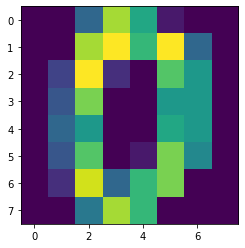

In [80]:
# let's see what one of the images looks like
img1 = data.images[0] # this should be a '0'
plt.imshow(img1)

In [81]:
def feature_engineering(X_train=data):

    # doing feature engineering – compute x symmetries, y symmetries, and density for each image
    x_symmetries = {x: 0 for x in range(0, 10)}
    y_symmetries = {y: 0 for y in range(0, 10)}
    densities = {z: 0 for z in range(0, 10)}

    # we will create a list of triples of features (represented as a list (of length 1797) of lists (of length 3))
    feature_list = []
    
    for i, img in enumerate(X_train.images):
        rx = compute_x_symmetry(img)
        x_symmetries[X_train.target[i]] += rx
    
        ry = compute_y_symmetry(img)
        y_symmetries[X_train.target[i]] += ry
    
        density = compute_density(img)
        densities[X_train.target[i]] += density
    
        feature_list.append([rx, ry, density])
    
    feature_array = np.array(feature_list)
        
    targets_count = Counter(X_train.target)
    
    for i in range(10):
        x_symmetries[i] /= targets_count[i]
        y_symmetries[i] /= targets_count[i]
        densities[i] /= targets_count[i]
        
    # we would like to transform this into a 20-dimensional feature space. do this via cubic transform
    cubic = PolynomialFeatures(3)
    transformed_feature_array = cubic.fit_transform(feature_array)/100
    
    avg_features = list(zip(x_symmetries.values(), y_symmetries.values(), densities.values()))
    avg_features = np.array([np.array([x, y, z]) for (x,y,z) in avg_features])
    transformed_avg_features = cubic.fit_transform(avg_features)
    
    return transformed_avg_features, transformed_feature_array

In [82]:
taf, tfa = feature_engineering()

In [83]:
print(tfa.shape) # 1797 x 20, 20-dimensional feature space
print(taf.shape) # 10 x 20
print(tfa)

(1797, 20)
(10, 20)
[[0.01       0.0143069  0.01198958 ... 0.06603516 0.25301056 0.96939789]
 [0.01       0.02052057 0.01583607 ... 0.12264771 0.3787706  1.1697501 ]
 [0.01       0.03511143 0.02616056 ... 0.36785156 0.75579498 1.55287109]
 ...
 [0.01       0.01571226 0.01672386 ... 0.16344238 0.57111003 1.99560638]
 [0.01       0.02270738 0.02888555 ... 0.44847656 0.83452159 1.55287109]
 [0.01       0.02007797 0.02368412 ... 0.34357422 0.88852453 2.29783203]]


In [84]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(tfa, data.target, test_size=0.4)
print(y_train)

[9 6 8 ... 8 7 5]


In [87]:
weights, losses = train(X_train, y_train, lr=0.01, num_iters=200)

res = predict(X_test, y_test, weights=weights)
print(res)

0.09735744089012517


In [ ]:
plt.plot(losses)
plt.show()